In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import ExponentialSmoothing

In [2]:
df=pd.read_csv('gdp-per-capita-ppp-constant-2011.csv')

In [3]:
df

,Year,"GDP per capita, PPP (constant 2011 international $)"
0,1990,1754.857
1,1991,1737.615
2,1992,1796.532
3,1993,1845.149
4,1994,1930.113
5,1995,2036.796
6,1996,2149.366
7,1997,2194.903
8,1998,2288.048
9,1999,2445.751


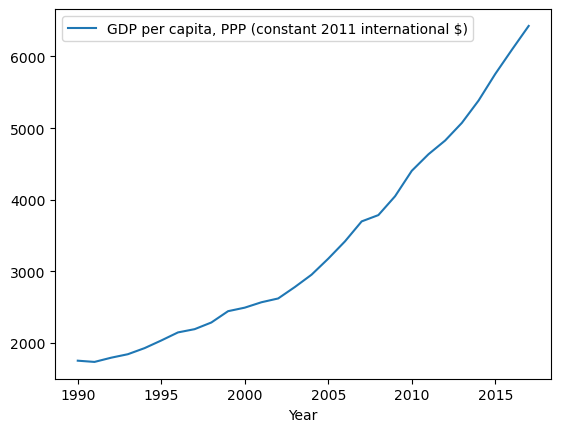

In [4]:
df.plot.line(x='Year',y='GDP per capita, PPP (constant 2011 international $)')
plt.show()

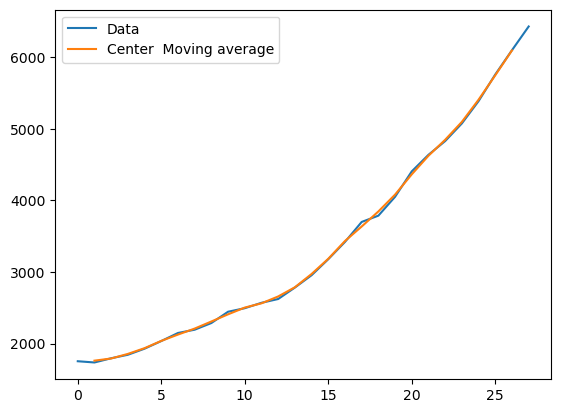

In [5]:
y=df['GDP per capita, PPP (constant 2011 international $)']
fcast=y.rolling(3,center=True).mean()
plt.plot(y,label='Data')
plt.plot(fcast,label='Center  Moving average')
plt.legend(loc='best')
plt.show()

In [6]:
y_train=df['GDP per capita, PPP (constant 2011 international $)'][:-5]
y_test=df['GDP per capita, PPP (constant 2011 international $)'][-5:]
span=3

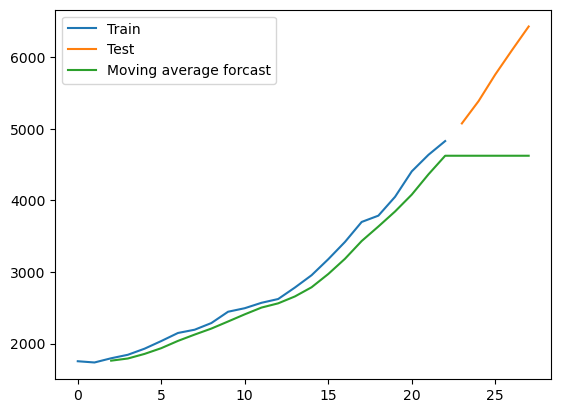

In [7]:
fcast=y_train.rolling(span).mean()
MA=fcast.iloc[-1]
MA_series=pd.Series(MA.repeat(len(y_test)))
MA_fcast=pd.concat([fcast,MA_series],ignore_index=True)
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Test')
plt.plot(MA_fcast,label='Moving average forcast')
plt.legend(loc='best')
plt.show()

In [8]:
rms=sqrt(mean_squared_error(y_test,MA_series))
rms

1224.2952023203386

# Simple Exponential Smoothing¶

In [37]:
from statsmodels.tsa.api import SimpleExpSmoothing
ses=SimpleExpSmoothing(y_train)

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


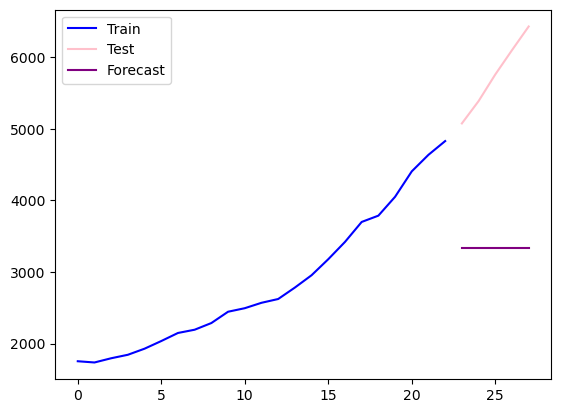

RSME =  2464.0994777314068


In [10]:
fit1=ses.fit(smoothing_level=0.1)
fcast1=fit1.forecast(len(y_test))
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.legend(loc='best')
plt.show()
print("RSME = ",sqrt(mean_squared_error(y_test,fcast1)))

# Holt Linear trend

In [26]:
from statsmodels.tsa.api import Holt

In [34]:
holt=Holt(y_train)
alpha=0.8
beta=0.02

In [35]:
fit1=holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1=fit1.forecast(len(y_test))

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


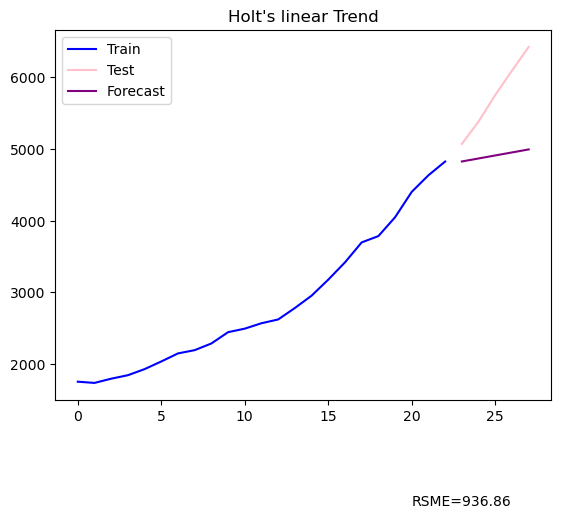

In [36]:
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error=round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(20,20,"RSME="+str(error))
plt.title("Holt's linear Trend")
plt.legend(loc='best')
plt.show()

# Holt exponential

In [32]:
holt=Holt(y_train,exponential=True)
fit1=holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fcast1=fit1.forecast(len(y_test))

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


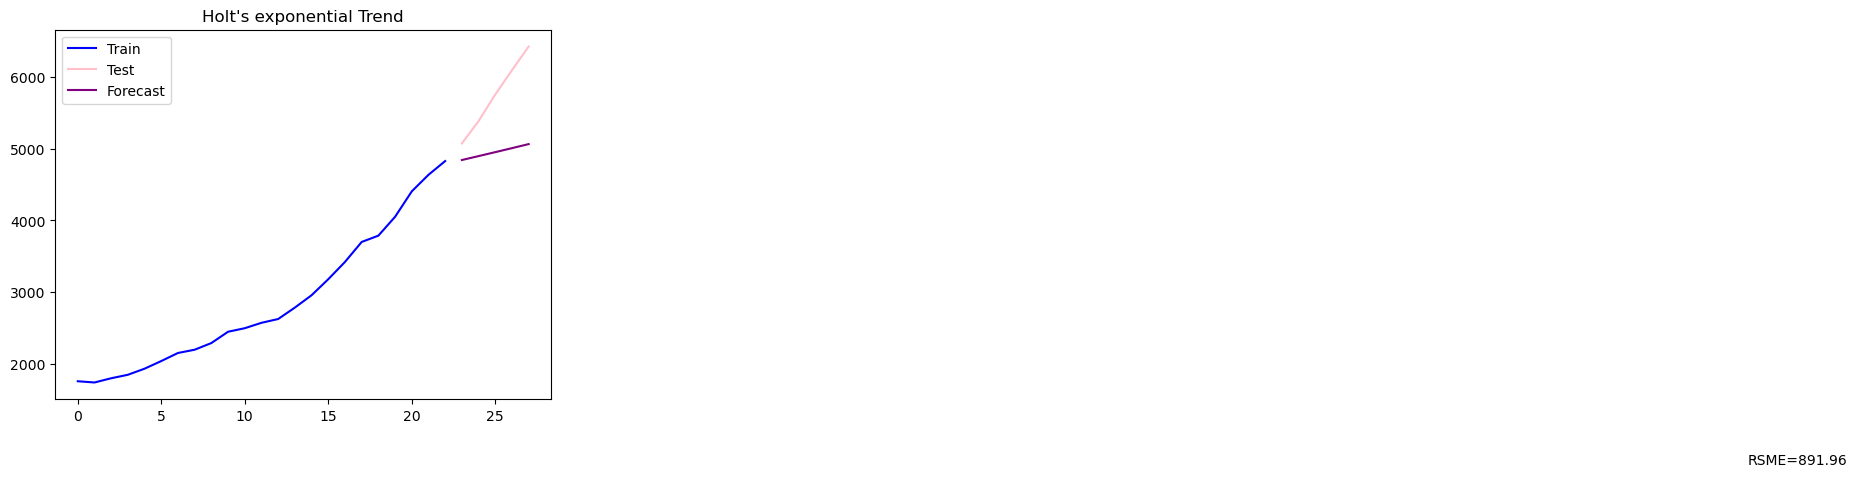

In [33]:
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error=round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,600,"RSME="+str(error))
plt.title("Holt's exponential Trend")
plt.legend(loc='best')
plt.show()

# Additive damp trend

In [17]:
phi=0.1

In [18]:
add_damp=Holt(y_train,damped_trend=True)
fit3=add_damp.fit(smoothing_level=alpha,smoothing_trend=beta,damping_trend=phi)
fcast3=fit3.forecast(len(y_test))

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


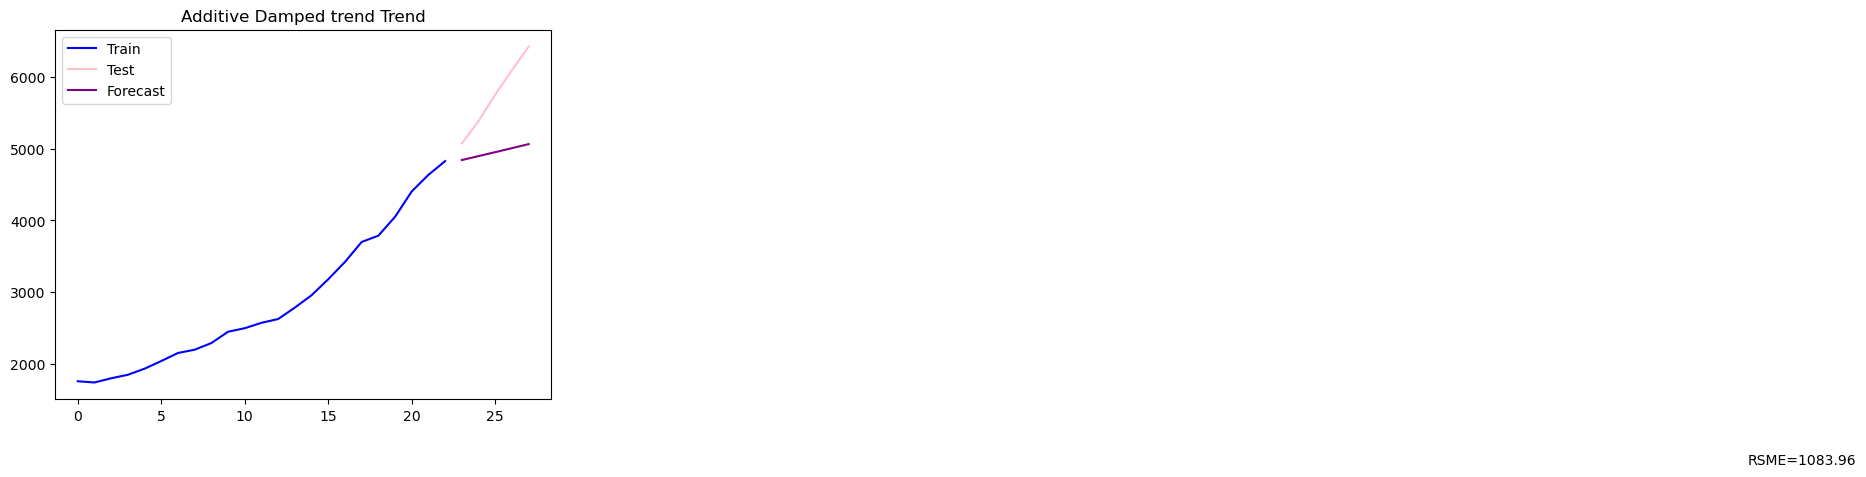

In [19]:
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error=round(sqrt(mean_squared_error(y_test,fcast3)),2)
plt.text(100,600,"RSME="+str(error))
plt.title("Additive Damped trend Trend")
plt.legend(loc='best')
plt.show()

# Multiplicative damped trend

In [20]:
add_damp=Holt(y_train,damped_trend=True,exponential=True)
fit3=add_damp.fit(smoothing_level=alpha,smoothing_trend=beta,damping_trend=phi)
fcast3=fit3.forecast(len(y_test))

/home/dai/anaconda3/lib/python3.11/site-packages/pandas/util/_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


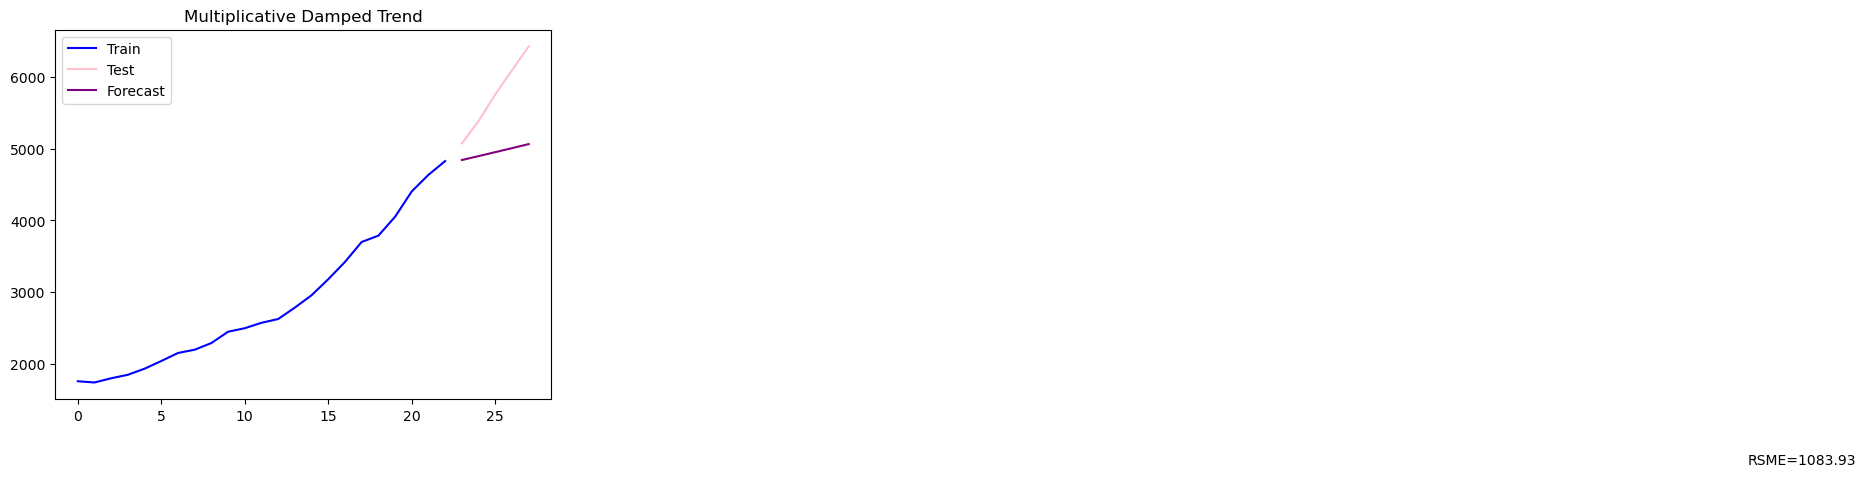

In [21]:
y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error=round(sqrt(mean_squared_error(y_test,fcast3)),2)
plt.text(100,600,"RSME="+str(error))
plt.title("Multiplicative Damped Trend")
plt.legend(loc='best')
plt.show()